# Model for Diabetes Risk Prediction 

## PIMA Indian Diabetes Dataset

 Actual Pima Diabetes Dataset

In [978]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [979]:
df = pd.read_csv('../Dataset/diabetes.csv')

In [980]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [981]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [982]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [983]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

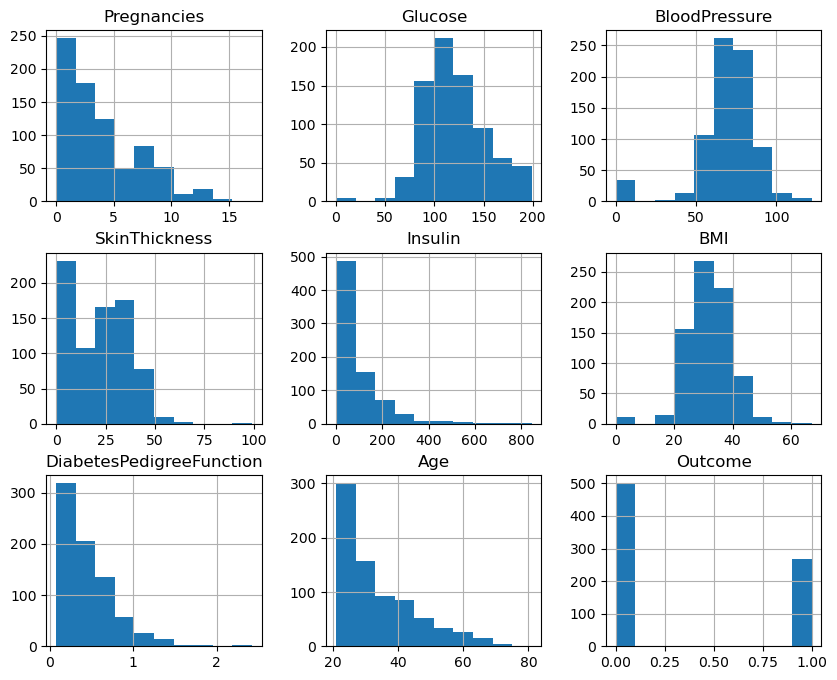

In [984]:
df.hist(bins=10, figsize=(10,8))

In [985]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Split Data 80:20

In [986]:
x = df.iloc[:,0:8] #select all rows, select columns 0 to 8
y = df['Outcome']

In [987]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [988]:
y.sample(5)

295    0
240    0
89     0
325    0
291    1
Name: Outcome, dtype: int64

In [989]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(x ,y , test_size=0.2)
# Split train and test into 80:20

In [990]:
X_train.shape

(614, 8)

In [991]:
y_train.shape

(614,)

In [992]:
x_test.shape

(154, 8)

In [993]:
from sklearn import preprocessing
stand = preprocessing.StandardScaler()
X_train = stand.fit_transform(X_train)
x_test = stand.transform(x_test)

Random Forest

In [994]:
parameters ={
      'criterion' : ['gini', 'entropy'],
      'max_features': ['sqrt'],
      'random_state': range(1, 51, 5),
      'min_samples_leaf': range(1, 51, 5),
      'n_estimators': range(1, 51, 5)}

In [995]:
%%time
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Create a RandomForestClassifier object
clf = RandomForestClassifier()
kf = KFold(n_splits=5, shuffle=True, random_state=0)
rf_classifier = GridSearchCV(clf, parameters, cv=kf, scoring='recall',n_jobs=-1 ,error_score='raise')

# Fit the model on training data
rf_classifier.fit(X_train, y_train)

# Get the best estimator from the GridSearch
best_model = rf_classifier.best_estimator_

# Fit the model on training data
rf_classifier.fit(X_train, y_train)

# Access the best model's cross-validation accuracy
best_score = rf_classifier.best_score_

print("Best Score (K-Fold CV):", best_score)
print(f"Best Parameters: {rf_classifier.best_params_}")

/Users/kamme/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Score (K-Fold CV): 0.6107388901506549
Best Parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 26, 'n_estimators': 1, 'random_state': 11}
CPU times: user 7.82 s, sys: 1.21 s, total: 9.03 s
Wall time: 2min 30s


/Users/kamme/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [996]:
# Make predictions on the test data
y_pred = best_model.predict(x_test)

In [997]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(cm)

[[87 16]
 [23 28]]


In [998]:
from sklearn.model_selection import cross_val_score
from statistics import stdev
score = cross_val_score(rf_classifier, X_train, y_train, cv=kf, scoring='recall')
avg_score = score.mean()
stdev = stdev(score)

/Users/kamme/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/kamme/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/kamme/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/kamme/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [999]:
ndf = [(recall, precision, f1, accuracy, avg_score, stdev)]

rf_score = pd.DataFrame(data = ndf, columns=
                        ['Recall','Precision','F1 Score', 'Accuracy', 'Avg CV Recall', 'Standard Deviation'])
rf_score.insert(0, 'Random Forest', 'Tuning hyperparameters')
rf_score

,Random Forest,Recall,Precision,F1 Score,Accuracy,Avg CV Recall,Standard Deviation
0,Tuning hyperparameters,0.54902,0.636364,0.589474,0.746753,0.53251,0.088949


SMOTE to help imbalance data

In [1000]:
from imblearn.over_sampling import SMOTE
(X_sample, y_sample) = train_test_split(df, test_size=0.2, stratify = y)

X_train = X_sample.iloc[:,:-1].values
y_train = X_sample.iloc[:,-1].values
x_test_smote = y_sample.iloc[:,:-1].values
y_test_smote = y_sample.iloc[:,-1].values

In [1001]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [1002]:
%%time
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Create a RandomForestClassifier object
clf = RandomForestClassifier()
kf = KFold(n_splits=5, shuffle=True, random_state=0)
rf_classifier = GridSearchCV(clf, parameters, cv=kf, scoring='recall',n_jobs=-1 ,error_score='raise')

# Fit the model on training data
rf_classifier.fit(X_train_smote, y_train_smote)

# Get the best estimator from the GridSearch
best_model = rf_classifier.best_estimator_

# Access the best model's cross-validation accuracy
smote_best_score = rf_classifier.best_score_

# Print the best accuracy
print("Best Score (K-Fold CV):", smote_best_score)
print(f"Best Parameters: {rf_classifier.best_params_}")

Best Score (K-Fold CV): 0.836457587254311
Best Parameters: {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 41, 'random_state': 31}
CPU times: user 5.05 s, sys: 933 ms, total: 5.98 s
Wall time: 2min 51s


/Users/kamme/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [1003]:
# Make predictions on the test data
y_pred_smote = best_model.predict(x_test_smote)

In [1004]:
cm = confusion_matrix(y_test_smote, y_pred_smote)
smote_accuracy = accuracy_score(y_test_smote, y_pred_smote)
smote_precision = precision_score(y_test_smote, y_pred_smote)
smote_recall = recall_score(y_test_smote, y_pred_smote)
smote_f1 = f1_score(y_test_smote, y_pred_smote)

print(cm)

[[82 18]
 [19 35]]


In [1005]:
from sklearn.model_selection import cross_val_score
from statistics import stdev
score2 = cross_val_score(rf_classifier, X_train_smote, y_train_smote, cv=kf, scoring='recall')
smote_avg_score = score2.mean()
smote_stdev = stdev(score2)

/Users/kamme/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/kamme/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/kamme/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/kamme/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [1006]:
ndf2 = [(smote_recall, smote_precision, smote_f1, smote_accuracy, smote_avg_score, smote_stdev)]

smote_rf_score = pd.DataFrame(data = ndf2, columns=
                        ['Recall','Precision','F1 Score', 'Accuracy', 'Avg CV Recall', 'Standard Deviation'])
smote_rf_score.insert(0, 'Random Forest', 'Tuning hyperparameters with SMOTE')
smote_rf_score

,Random Forest,Recall,Precision,F1 Score,Accuracy,Avg CV Recall,Standard Deviation
0,Tuning hyperparameters with SMOTE,0.648148,0.660377,0.654206,0.75974,0.801313,0.056327


Result comparison

In [1008]:
predictions = pd.concat([rf_score, smote_rf_score], ignore_index=True, sort=False)
predictions.sort_values(by=['Avg CV Recall'], ascending=False)

,Random Forest,Recall,Precision,F1 Score,Accuracy,Avg CV Recall,Standard Deviation
1,Tuning hyperparameters with SMOTE,0.648148,0.660377,0.654206,0.759740,0.801313,0.056327
0,Tuning hyperparameters,0.549020,0.636364,0.589474,0.746753,0.532510,0.088949
